## Data loading

In [1]:
from _common.database_communicator.db_connector import DBConnector
import pandas as pd

In [2]:
connector = DBConnector()
engine = connector.create_sql_engine()

In [8]:
df = pd.read_sql_query("SELECT * FROM data_main", con=engine)

## Data cleaning

In [4]:
df['floor'].fillna('brak informacji', inplace=True)
df['status'].fillna('brak informacji', inplace=True)
df['property_type'].fillna('brak informacji', inplace=True)
df['rooms'].fillna(1, inplace=True)
df['year_built'].fillna('brak informacji', inplace=True)
df['property_condition'].fillna('brak informacji', inplace=True)

In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

73
0


### price column

In [6]:
df['price'] = df['price'].str.replace('zł', '').str \
    .replace(' ', '') \
    .replace(',', '.', regex=True) \
    .replace('Zapytajocenę', None, regex=True) \
    .astype(float)

In [7]:
df = df[df['price'].notna()]
df = df[df['price'] < 5000000.0]

### size column

In [ ]:
df['size']= df['size'].str.replace(',', '.').astype(float)

### location column

In [ ]:
import pandas as pd
import re

loc_list = ['Grunwald', 'Górczyn', 'Ławica', 'Łazarz', 'Junikowo', 'Jeżyce', 
            'Podolany', 'Sołacz', 'Wilda', 'Dębiec', 'Nowe Miasto', 'Łacina', 
            'Rataje', 'Starołęka Mała', 'Stare Miasto', 'Naramowice', 
            'Piątkowo', 'Winogrady', 'Chartowo']

# Function to find and return matching location from loc_list
def find_location(x):
    for loc in loc_list:
        if bool(re.search(loc, x)):
            return loc
    return 'Poznań'

# Apply the function on 'location' column
df['location'] = df['location'].apply(find_location)

In [ ]:
df['location'].value_counts()

location
Grunwald        383
Stare Miasto    382
Nowe Miasto     282
Jeżyce          261
Wilda            89
Poznań           20
Piątkowo          7
Winogrady         6
Podolany          5
Naramowice        4
Rataje            4
Górczyn           2
Łazarz            2
Chartowo          1
Sołacz            1
Junikowo          1
Ławica            1
Name: count, dtype: int64

### floor column

In [ ]:
df['floor'] = df['floor'].apply(lambda x: x.split('/')[0] if type(x) == str else x)

In [ ]:
import pandas as pd

def extract_numbers(s):
    return ''.join(filter(str.isdigit, s)) if any(map(str.isdigit, s)) else s


df['floor'] = df['floor'].str.replace('parter', '0').str.replace('poddasze', '10').apply(extract_numbers)
df['floor'] = df['floor'].str.replace('zapytaj', 'brak informacji').str.replace('suterena', '-1')

In [ ]:
df['floor'].unique()

array(['1', '5', '3', '2', '0', '4', '7', '10', 'brak informacji', '6',
       '-1', '8', '9'], dtype=object)

### status column

In [ ]:
df['status'].unique()

array(['wtórny', 'pierwotny', 'brak informacji'], dtype=object)

### property_type column

In [ ]:
df['property_type'] = df['property_type'].str.replace('plomba', 'pozostałe').str.replace('bliźniak', 'wolnostojący').str.replace('dom wolnostojący', 'wolnostojący')
df['property_type'].unique()

array(['brak informacji', 'blok', 'apartamentowiec', 'kamienica',
       'pozostałe', 'wolnostojący', 'szeregowiec'], dtype=object)

In [ ]:
df['property_type'].value_counts()

property_type
brak informacji    614
blok               407
kamienica          199
apartamentowiec    140
szeregowiec         46
wolnostojący        32
pozostałe           13
Name: count, dtype: int64

### rooms column

In [ ]:
df['rooms'].fillna(1, inplace=True)
df['rooms'].unique()

array(['2', '3', '1', '4', '6', '5', 1, '7', '8', '9', '10'], dtype=object)

### year_built column

In [ ]:
df['year_built'].unique()

array(['brak informacji', '2023', '1900', '1930', '2003', '1960', '2017',
       '2024', '2012', '1970', '1980', '2009', '1905', '1950', '2020',
       '1962', '2008', '1906', '1912', '1983', '2013', '2010', '2001',
       '2018', '2005', '1902', '1972', '2019', '1990', '2014', '1891',
       '2016', '2015', '1968', '1910', '1996', '2007', '1965', '1985',
       '1923', '2006', '1945', '1955', '1986', '1924', '1963', '2022',
       '1880', '1928', '1978', '2021', '1997', '2011', '2025', '1920',
       '2000', '1999', '1901', '1927', '1929', '1975', '1992', '1969',
       '1908', '1942', '1959', '1961', '1949', '2004', '1911', '1989',
       '1987', '1933', '1976', '1979', '1967', '1964', '1903', '1904',
       '1875', '1938'], dtype=object)

### property_condition column

In [ ]:
df['property_condition'] = df['property_condition'].str.replace('zapytaj', 'brak informacji')
df['property_condition'].unique()

array(['do zamieszkania', 'do wykończenia', 'brak informacji',
       'do remontu', 'stan surowy zamknięty'], dtype=object)

## Casting column types

In [ ]:
numerical_col = ['size', 'rooms']
categorical_col = ['status', 'property_type', 'floor', 'year_built', 'property_condition', 'location']

for col in numerical_col:
    df[col] = df[col].astype(float)
    
for col in categorical_col:
    df[col] = df[col].astype('category')

In [32]:
from _common.misc.variables import LOCATION_LIST, FEAT_COLS, TARGET_COL, CATEGORICAL_FEATS, NUMERIC_FEATS

def cast_types(df):
    numerical_col = NUMERIC_FEATS
    categorical_col = CATEGORICAL_FEATS

    for col in numerical_col:
        df[col] = df[col].astype(float)

    for col in categorical_col:
        df[col] = df[col].astype("category")
    
    return df

df = cast_types(df)

In [33]:
FEAT_COLS = ['status', 'size', 'property_type', 'rooms', 'floor', 'year_built', 'property_condition', 'location']
TARGET_COL = 'price'

X = df[FEAT_COLS]
y = df[TARGET_COL].astype(float)

In [14]:
X = X.replace(pd.NA, None)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# X_val.to_csv('X_val.tsv', index=False, sep = '\t')
# y_val.to_csv('y_val.tsv', index=False, sep = '\t')
# X_test.to_csv('X_test.tsv', index=False, sep = '\t')
# y_test.to_csv('y_test.tsv', index=False, sep = '\t')
# X_train.to_csv('X_train.tsv', index=False, sep = '\t')
# y_train.to_csv('y_train.tsv', index=False, sep = '\t')

In [17]:
import pandas as pd
from ml_model.src.data.data_preprocessing import DataPreprocessor

# preprocessor = DataPreprocessor()

# preprocessor.run_preprocessing_pipeline()
# X_train, X_test, y_train, y_test = preprocessor.train_test_split()

# lst = ['size', 'rooms']
# X_train = X_train[lst]
# X_test = X_test[lst]

# Model

In [2]:
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
regressor = XGBRegressor(enable_categorical=True)

In [4]:
## Hyper Parameter Optimization

param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [3, 5, 7, 9, 15, 25, 30],
    "min_child_weight": [1, 3, 5, 7, 10, 15, 20],
    "subsample": [0.5, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.5],
    "scale_pos_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "eta": [0.01, 0.1, 0.2, 0.3, 0.5],
}

In [5]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=param_grid,
            cv=5, n_iter=400,
            scoring = 'neg_mean_absolute_error',n_jobs = 8,
            verbose = 2, 
            return_train_score = True,
            random_state=42)

In [6]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[CV] END colsample_bytree=0.8, eta=0.2, gamma=0.3, learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=50, scale_pos_weight=6, subsample=1.0; total time=   0.3s[CV] END colsample_bytree=0.8, eta=0.2, gamma=0.3, learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=50, scale_pos_weight=6, subsample=1.0; total time=   0.2s

[CV] END colsample_bytree=0.8, eta=0.2, gamma=0.3, learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=50, scale_pos_weight=6, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, eta=0.2, gamma=0.3, learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=50, scale_pos_weight=6, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, eta=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, eta=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                                        'eta': [0.01, 0.1, 0.2, 0.3, 0.5],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.5],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9, 15, 25, 30],
                                        'min_child_weight': [1, 3, 5, 7, 10, 15,
                                                             20],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500],
                                        'scale_pos_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'subsample': [0.5, 0.8, 0.9, 1.0]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [7]:
print(random_cv.best_params_)
print(random_cv.best_score_) 

random_cv.best_estimator_.feature_importances_

{'subsample': 0.8, 'scale_pos_weight': 8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 25, 'learning_rate': 0.2, 'gamma': 0.3, 'eta': 0.1, 'colsample_bytree': 1.0}
-186456.8961347561


array([0.01570841, 0.47129813, 0.02733788, 0.15836212, 0.0254365 ,
       0.038205  , 0.12099012, 0.14266182], dtype=float32)

In [8]:
eval_set = [(X_train, y_train), (X_test, y_test)]

regressor = XGBRegressor(**random_cv.best_params_, enable_categorical=True, objective='reg:squarederror')
regressor.set_params(eval_metric='rmse', early_stopping_rounds=10)
regressor.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=10,
             enable_categorical=True, eta=0.1, eval_metric='rmse',
             feature_types=None, gamma=0.3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=25,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

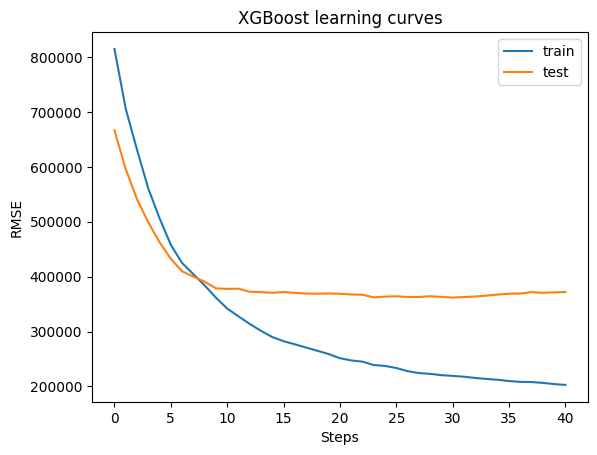

In [9]:
import matplotlib.pyplot as plt
results = regressor.evals_result()

# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
plt.xlabel("Steps")
plt.ylabel("RMSE")
plt.title("XGBoost learning curves")
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
preds = regressor.predict(X_test)

# Evaluate the model
mae_score = mean_absolute_error(y_test, preds)
print('MAE:', mae_score)

rmse_score = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE:', rmse_score)

r2 = r2_score(y_test, preds)
print('R2:', r2)

MAE: 162253.88536549706
RMSE: 361839.4998689037
R2: 0.7729029066207654


In [38]:
X_test = pd.read_csv('in.tsv', sep='\t')
X_test = cast_types(X_test)

In [43]:
import pickle
from ml_model.src.models.train_model import XGBoostRegressor

model = XGBoostRegressor.load_model('../src/models/xgboost_regressor.pkl')
out = pd.Series(model.predict(X_test))
out.to_csv('out.tsv', sep='\t', index=False, header=False)